## Objectif: 

L'objectif dans ce concours est de prédire si une personne sera en défaut sur un prêt dans l'ensemble de données test.csv. Vous recevrez deux ensembles de données: train.csv (contient les fonctionnalités et Credit Default comme cible) et test.csv (fonctionnalités uniquement).



# Nettotage des données 

In [572]:
import warnings
warnings.filterwarnings('ignore')

In [573]:
import pandas as pd
df = pd.read_csv('../Bases/train.csv')


print(df.head())

   Id Home Ownership  Annual Income Years in current job  Tax Liens  \
0   0       Own Home       482087.0                  NaN        0.0   
1   1       Own Home      1025487.0            10+ years        0.0   
2   2  Home Mortgage       751412.0              8 years        0.0   
3   3       Own Home       805068.0              6 years        0.0   
4   4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0            

In [574]:
df.shape

(7500, 18)

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [576]:
import skimpy as sp

stats = sp.skim(df)  # Obtenir les statistiques
print(stats)  # Afficher les statistiques

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7500   │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 18     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃      ┃       ┃          ┃          ┃        ┃        ┃         ┃         ┃           ┃        ┃  │
│ ┃ e          ┃ NA   ┃ NA %  ┃ mean     ┃ sd       ┃ p0     ┃ p25    ┃ p50     ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Id         │    0 │     0 │     3750 │     2165 │      0 │   1875 │    3750 │    5624 │      7499 │ ▇▇▇▇▇▇ │  │
│ │ Annual     │ 1557 │ 20.76 │  1366000 │   845300 │ 164600 │ 844300 │ 1168000 │ 1640000 │  10150000 │   ▇▂   │  │
│ │ Income     │      │       │          │          │        │        │         │         │           │        │  │
│ │ Tax Liens  │    0 │     0 │  0.03013 │   0.2716 │      0 │      0 │       0 │       0 │         7 │   ▇    │  │
│ │ Number of  │    0 │     0 │    11.13 │    4.909 │      2 │      8 │      10 │      14 │        43 │  ▅▇▂   │  │
│ │ Open       │      │       │          │          │        │        │         │         │           │        │  │
│ │ Accounts   │      │       │          │          │        │        │         │         │           │        │  │
│ │ Years of   │    0 │     0 │    18.32 │    7.042 │      4 │   13.5 │      17 │    21.8 │      57.7 │  ▃▇▃▁  │  │
│ │ Credit     │      │       │          │          │        │        │         │         │           │        │  │
│ │ History    │      │       │          │          │        │        │         │         │           │        │  │
│ │ Maximum    │    0 │     0 │   945200 │ 16030000 │      0 │ 279200 │  478200 │  793500 │ 130500000 │   ▇    │  │
│ │ Open       │      │       │          │          │        │        │         │         │         0 │        │  │
│ │ Credit     │      │       │          │          │        │        │         │         │           │        │  │
│ │ Number of  │    0 │     0 │     0.17 │   0.4986 │      0 │      0 │       0 │       0 │         7 │   ▇    │  │
│ │ Credit     │      │       │          │          │        │        │         │         │           │        │  │
│ │ Problems   │      │       │          │          │        │        │         │         │           │        │  │
│ │ Months     │ 4081 │ 54.41 │    34.69 │    21.69 │      0 │     16 │      32 │      50 │       118 │ ▇▇▅▃▁  │  │
│ │ since last │      │       │          │          │        │        │         │         │           │        │  │
│ │ delinquent │      │       │          │          │        │        │         │         │           │        │  │
│ │ Bankruptci │   14 │  0.19 │   0.1172 │   0.3472 │      0 │      0 │       0 │       0 │         4 │   ▇▁   │  │
│ │ es         │      │       │          │          │   

None


In [577]:
df.columns

Index(['Id', 'Home Ownership', 'Annual Income', 'Years in current job',
       'Tax Liens', 'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default'],
      dtype='object')

### Commentaire:

Le jeu de donnée train à 04 colonnes qui contiennent plusieurs valeurs manquantes(Na). 

Pour la gestion des valeurs manquantes, nous allons les remplacer par la médiane.

In [578]:
#Gestion des valeurs manquantes
df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)

df['Years in current job'].fillna('Unknown', inplace=True) #Il s'agit d'une colonne catégorielle. Vous pouvez imputer une valeur comme "Unknown"

df['Months since last delinquent'].fillna(0, inplace=True) #remplir avec une valeur comme 0

df['Bankruptcies'].fillna(0, inplace=True) #hypothèse que les données manquantes signifient qu'il n'y a pas eu de faillite

# Remplacer les valeurs manquantes par la médiane
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)


In [579]:
print(df.isnull().sum()) #Colonnes avec des valeurs manquantes 

Id                              0
Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
dtype: int64


## Matrice de corrélation

In [580]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation sur les colonnes numériques
correlation_matrix = numeric_columns.corr()

# Afficher les corrélations spécifiques avec la variable 'Credit Default'
print(correlation_matrix['Credit Default'].sort_values(ascending=False))




Credit Default                  1.000000
Credit Score                    0.376220
Number of Open Accounts         0.028884
Tax Liens                       0.024368
Number of Credit Problems       0.020088
Monthly Debt                    0.018480
Id                              0.012858
Months since last delinquent    0.010110
Bankruptcies                    0.001640
Maximum Open Credit            -0.014275
Current Credit Balance         -0.019522
Years of Credit History        -0.020567
Annual Income                  -0.095203
Current Loan Amount            -0.226522
Name: Credit Default, dtype: float64


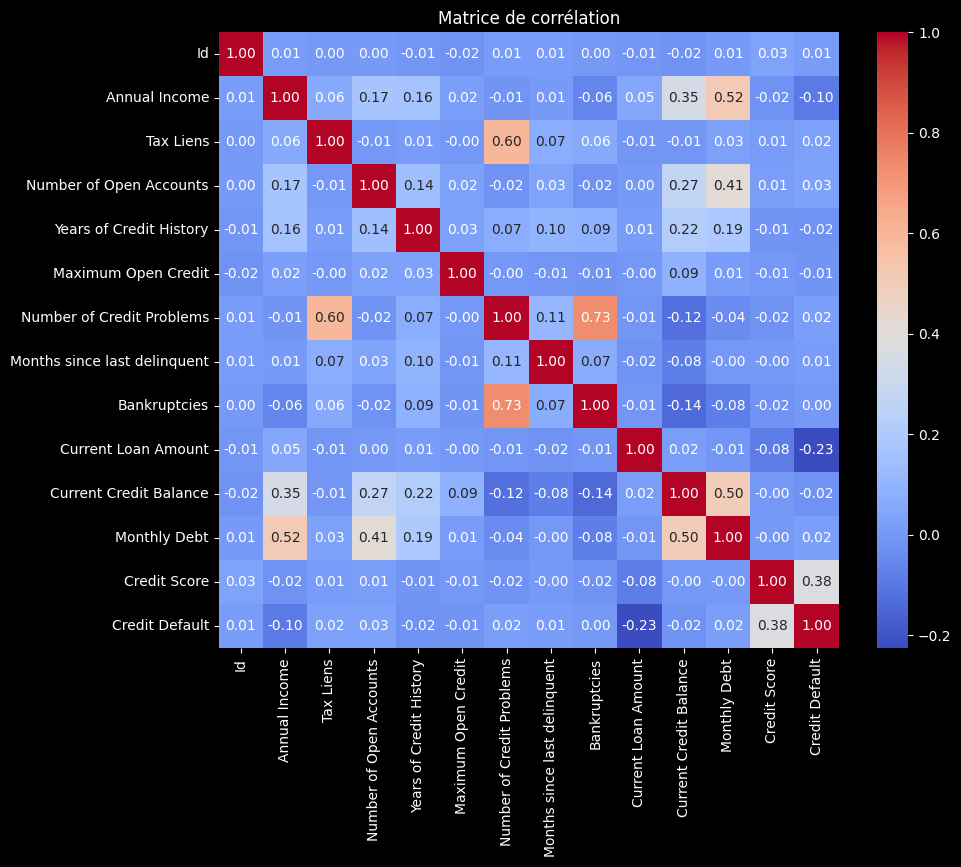

In [581]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()


### Intrepretation:

On note une très faible correlation linéaire entre le Credit Default et les autre variables quantitative.

De même, on note d'une part une faible liaison négative entre Credit Default et Current Loan Amont et d'autre part une faible liaison postive entre Credit Default et Credit Score

Certaines colonnes ont des corrélations très faibles (proches de 0), ce qui peut indiquer qu'elles n'ont pas d'impact direct sur Credit Default.

### Gestion des variables qualitative

In [582]:
from sklearn.preprocessing import LabelEncoder

# Encodage des colonnes catégorielles avec LabelEncoder
le = LabelEncoder()
df['Years in current job'] = le.fit_transform(df['Years in current job'].astype(str))

# Utilisation du One-Hot Encoding pour les autres variables catégorielles
df_encoded = pd.get_dummies(df, columns=['Home Ownership', 'Purpose', 'Term'])

# Vérification des types de colonnes
#print(df_encoded.dtypes)

# Calcul de la matrice de corrélation après encodage
correlation_matrix_encoded = df_encoded.corr()

# Afficher les corrélations spécifiques avec 'Credit Score'
print(correlation_matrix_encoded['Credit Default'].sort_values(ascending=False))


Credit Default                  1.000000
Credit Score                    0.376220
Term_Long Term                  0.181487
Home Ownership_Rent             0.060114
Purpose_business loan           0.042531
Purpose_small business          0.033661
Number of Open Accounts         0.028884
Purpose_renewable energy        0.026078
Tax Liens                       0.024368
Years in current job            0.020398
Number of Credit Problems       0.020088
Monthly Debt                    0.018480
Id                              0.012858
Home Ownership_Own Home         0.010260
Months since last delinquent    0.010110
Purpose_other                   0.010059
Purpose_medical bills           0.006112
Bankruptcies                    0.001640
Purpose_wedding                -0.001499
Purpose_take a trip            -0.001794
Purpose_vacation               -0.002305
Purpose_buy house              -0.002554
Purpose_buy a car              -0.008033
Purpose_moving                 -0.008512
Purpose_major pu

### Interpretation:

La corrélation la plus élevée avec Credit Default est pour Credit Score (0.44), ce qui peut indiquer une relation modérée entre ces deux variables.
Term_Long Term et Term_Short Term ont des corrélations opposées (0.181 et -0.181), ce qui est logique car elles sont mutuellement exclusives dans un encodage one-hot.

Certaines colonnes ont des corrélations très faibles (proches de 0), ce qui peut indiquer qu'elles n'ont pas d'impact direct sur Credit Default.

## Conversion des colonnes booléennes en 

Pour soumettre notre jeu de donnée train aux différents modèles de classification, nous avons besoin de convertir nos colonnes issues du pd.get_dummies() en de type int, cela facilitera leur traitement dans certains modèles ou calculs.

In [583]:
df_encoded = df_encoded.astype(int)
print(df_encoded.dtypes )


Id                              int64
Annual Income                   int64
Years in current job            int64
Tax Liens                       int64
Number of Open Accounts         int64
Years of Credit History         int64
Maximum Open Credit             int64
Number of Credit Problems       int64
Months since last delinquent    int64
Bankruptcies                    int64
Current Loan Amount             int64
Current Credit Balance          int64
Monthly Debt                    int64
Credit Score                    int64
Credit Default                  int64
Home Ownership_Have Mortgage    int64
Home Ownership_Home Mortgage    int64
Home Ownership_Own Home         int64
Home Ownership_Rent             int64
Purpose_business loan           int64
Purpose_buy a car               int64
Purpose_buy house               int64
Purpose_debt consolidation      int64
Purpose_educational expenses    int64
Purpose_home improvements       int64
Purpose_major purchase          int64
Purpose_medi

In [584]:
#print(df_encoded.head())

## Normalisation eventuelle

Pour passer ensuite ces données dans les modèles de machine learning, nous allons normaliser les colonnes pour éviter les biais dus à des échelles différentes.

In [585]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Sélectionner uniquement les colonnes numériques à normaliser (exclure 'Id' et Credit Default)

numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns.difference(['Id', 'Credit Default'])

# Appliquer la normalisation uniquement aux colonnes numériques sélectionnées

df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])


##  Résumé statistiques après nettoyage et traitement des données

In [586]:
print(sp.skim(df_encoded))  

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7500   │ │ float64     │ 34    │                                                          │
│ │ Number of columns │ 36     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃    ┃      ┃           ┃        ┃          ┃          ┃          ┃           ┃        ┃        ┃  │
│ ┃ e          ┃ NA ┃ NA % ┃ mean      ┃ sd     ┃ p0       ┃ p25      ┃ p50      ┃ p75       ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Id         │  0 │    0 │      3750 │   2165 │        0 │     1875 │     3750 │      5624 │   7499 │ ▇▇▇▇▇▇ │  │
│ │ Annual     │  0 │    0 │ 5.969e-17 │      1 │   -1.534 │  -0.5209 │  -0.2073 │    0.2309 │  11.66 │   ▇▁   │  │
│ │ Income     │    │      │           │        │          │          │          │           │        │        │  │
│ │ Years in   │  0 │    0 │ 6.253e-17 │      1 │   -1.169 │  -0.8782 │  -0.2963 │    0.8673 │  2.031 │ ▇▃▃▂▂▃ │  │
│ │ current    │    │      │           │        │          │          │          │           │        │        │  │
│ │ job        │    │      │           │        │          │          │          │           │        │        │  │
│ │ Tax Liens  │  0 │    0 │ 2.274e-17 │      1 │   -0.111 │   -0.111 │   -0.111 │    -0.111 │  25.66 │   ▇    │  │
│ │ Number of  │  0 │    0 │ 3.647e-17 │      1 │    -1.86 │  -0.6378 │  -0.2304 │    0.5845 │  6.493 │  ▅▇▂   │  │
│ │ Open       │    │      │           │        │          │          │          │           │        │        │  │
│ │ Accounts   │    │      │           │        │          │          │          │           │        │        │  │
│ │ Years of   │  0 │    0 │ 2.937e-17 │      1 │    -1.97 │  -0.6935 │  -0.1261 │    0.4412 │  5.547 │  ▃▇▃▁  │  │
│ │ Credit     │    │      │           │        │          │          │          │           │        │        │  │
│ │ History    │    │      │           │        │          │          │          │           │        │        │  │
│ │ Maximum    │  0 │    0 │ -4.737e-1 │      1 │ -0.05898 │ -0.04155 │ -0.02914 │ -0.009463 │  81.36 │   ▇    │  │
│ │ Open       │    │      │         8 │        │          │          │          │           │        │        │  │
│ │ Credit     │    │      │           │        │          │          │          │           │        │        │  │
│ │ Number of  │  0 │    0 │ -7.011e-1 │      1 │   -0.341 │   -0.341 │   -0.341 │    -0.341 │   13.7 │   ▇    │  │
│ │ Credit     │    │      │         7 │        │          │          │          │           │        │        │  │
│ │ Problems   │    │      │           │        │          │          │          │           │        │        │  │
│ │ Months     │  0 │    0 │ -9.142e-1 │      1 │  -0.6983 │  -0.6983 │  -0.6983 │    0.5822 │  4.512 │  ▇▂▁▁  │  │
│ │ since last │    │      │         7 │        │          │          │          │           │        │        │  │
│ │ delinquent │    │      │           │        │       

None


# Entrainement des différents modèles

In [587]:
import pandas as pd

# Donnée d'entrainement (train)
train_df = df_encoded

# Charger les données (test)
test_df = pd.read_csv('../Bases/test.csv')


In [588]:
#print(train_df.head())
print(test_df.head())

     Id Home Ownership  Annual Income Years in current job  Tax Liens  \
0  7500           Rent            NaN              4 years        0.0   
1  7501           Rent       231838.0               1 year        0.0   
2  7502  Home Mortgage      1152540.0              3 years        0.0   
3  7503  Home Mortgage      1220313.0            10+ years        0.0   
4  7504  Home Mortgage      2340952.0              6 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                      9.0                     12.5             220968.0   
1                      6.0                     32.7              55946.0   
2                     10.0                     13.7             204600.0   
3                     16.0                     17.0             456302.0   
4                     11.0                     23.6            1207272.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        0.0

In [589]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            2500 non-null   int64  
 1   Home Ownership                2500 non-null   object 
 2   Annual Income                 1987 non-null   float64
 3   Years in current job          2414 non-null   object 
 4   Tax Liens                     2500 non-null   float64
 5   Number of Open Accounts       2500 non-null   float64
 6   Years of Credit History       2500 non-null   float64
 7   Maximum Open Credit           2500 non-null   float64
 8   Number of Credit Problems     2500 non-null   float64
 9   Months since last delinquent  1142 non-null   float64
 10  Bankruptcies                  2497 non-null   float64
 11  Purpose                       2500 non-null   object 
 12  Term                          2500 non-null   object 
 13  Cur

In [590]:
test_df.shape

(2500, 17)

### Statistiques decriptive du jeu de donnée test

In [591]:
import skimpy as sp

stats = sp.skim(test_df)  # Obtenir les statistiques
print(stats)  # Afficher les statistiques

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2500   │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃      ┃       ┃          ┃          ┃        ┃        ┃         ┃         ┃           ┃        ┃  │
│ ┃ e          ┃ NA   ┃ NA %  ┃ mean     ┃ sd       ┃ p0     ┃ p25    ┃ p50     ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Id         │    0 │     0 │     8750 │    721.8 │   7500 │   8125 │    8750 │    9374 │      9999 │ ▇▇▇▇▇▇ │  │
│ │ Annual     │  513 │ 20.52 │  1367000 │   917100 │ 106500 │ 852300 │ 1178000 │ 1630000 │  14980000 │   ▇    │  │
│ │ Income     │      │       │          │          │        │        │         │         │           │        │  │
│ │ Tax Liens  │    0 │     0 │   0.0352 │   0.3863 │      0 │      0 │       0 │       0 │        15 │   ▇    │  │
│ │ Number of  │    0 │     0 │    11.18 │    4.853 │      1 │      8 │      10 │      14 │        48 │  ▅▇▂   │  │
│ │ Open       │      │       │          │          │        │        │         │         │           │        │  │
│ │ Accounts   │      │       │          │          │        │        │         │         │           │        │  │
│ │ Years of   │    0 │     0 │    18.33 │    7.255 │    3.9 │   13.4 │      17 │    22.1 │      53.4 │  ▃▇▃▁  │  │
│ │ Credit     │      │       │          │          │        │        │         │         │           │        │  │
│ │ History    │      │       │          │          │        │        │         │         │           │        │  │
│ │ Maximum    │    0 │     0 │   710600 │  1512000 │      0 │ 278600 │  478700 │  802600 │  54480000 │   ▇    │  │
│ │ Open       │      │       │          │          │        │        │         │         │           │        │  │
│ │ Credit     │      │       │          │          │        │        │         │         │           │        │  │
│ │ Number of  │    0 │     0 │    0.162 │   0.5599 │      0 │      0 │       0 │       0 │        15 │   ▇    │  │
│ │ Credit     │      │       │          │          │        │        │         │         │           │        │  │
│ │ Problems   │      │       │          │          │        │        │         │         │           │        │  │
│ │ Months     │ 1358 │ 54.32 │    34.18 │    22.02 │      0 │     16 │      30 │      50 │        82 │ ▆▇▆▅▃▃ │  │
│ │ since last │      │       │          │          │        │        │         │         │           │        │  │
│ │ delinquent │      │       │          │          │        │        │         │         │           │        │  │
│ │ Bankruptci │    3 │  0.12 │   0.1069 │   0.3572 │      0 │      0 │       0 │       0 │         5 │   ▇▁   │  │
│ │ es         │      │       │          │          │   

None


### Interpretation:

On observe que les colonne Annual Income, Months sincs last delinquent, Credit Score et la variable qualitative Years in current job contiennent des valeurs manquantes. 


In [592]:
test_df.isna().sum()

Id                                 0
Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

### Nettoyage et traitement du jeu de donnée test

In [593]:
#Gestion des valeurs manquantes
test_df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)

test_df['Years in current job'].fillna('Unknown', inplace=True) #Il s'agit d'une colonne catégorielle. Vous pouvez imputer une valeur comme "Unknown"

test_df['Months since last delinquent'].fillna(0, inplace=True) #remplir avec une valeur comme 0

test_df['Bankruptcies'].fillna(0, inplace=True) #hypothèse que les données manquantes signifient qu'il n'y a pas eu de faillite

# Remplacer les valeurs manquantes par la médiane
test_df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)


In [594]:
test_df.isna().sum()

Id                              0
Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
dtype: int64

### Encodage des colonnes catégoriques

In [595]:
from sklearn.preprocessing import LabelEncoder

# Encodage des colonnes catégorielles avec LabelEncoder
le = LabelEncoder()
test_df['Years in current job'] = le.fit_transform(test_df['Years in current job'].astype(str))

# Utilisation du One-Hot Encoding pour les autres variables catégorielles
test_df_encoded = pd.get_dummies(test_df, columns=['Home Ownership', 'Purpose', 'Term'])

# Vérification des types de colonnes
print(test_df_encoded.dtypes)



Id                                int64
Annual Income                   float64
Years in current job              int64
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Home Ownership_Have Mortgage       bool
Home Ownership_Home Mortgage       bool
Home Ownership_Own Home            bool
Home Ownership_Rent                bool
Purpose_business loan              bool
Purpose_buy a car                  bool
Purpose_buy house                  bool
Purpose_debt consolidation         bool
Purpose_educational expenses       bool
Purpose_home improvements          bool
Purpose_major purchase             bool


## Conversion en int des colonnes bool

In [596]:
test_df_encoded = test_df_encoded.astype(int)
print(test_df_encoded.dtypes )


Id                              int64
Annual Income                   int64
Years in current job            int64
Tax Liens                       int64
Number of Open Accounts         int64
Years of Credit History         int64
Maximum Open Credit             int64
Number of Credit Problems       int64
Months since last delinquent    int64
Bankruptcies                    int64
Current Loan Amount             int64
Current Credit Balance          int64
Monthly Debt                    int64
Credit Score                    int64
Home Ownership_Have Mortgage    int64
Home Ownership_Home Mortgage    int64
Home Ownership_Own Home         int64
Home Ownership_Rent             int64
Purpose_business loan           int64
Purpose_buy a car               int64
Purpose_buy house               int64
Purpose_debt consolidation      int64
Purpose_educational expenses    int64
Purpose_home improvements       int64
Purpose_major purchase          int64
Purpose_medical bills           int64
Purpose_movi

## Résumé statistique après nettoyage et traitement du jeu de donnée test

In [597]:
import skimpy as sp

stats = sp.skim(test_df_encoded)  # Obtenir les statistiques
print(stats)  # Afficher les statistiques

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2500   │ │ int64       │ 34    │                                                          │
│ │ Number of columns │ 34     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0     ┃ p25    ┃ p50     ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Id            │  0 │    0 │     8750 │    721.8 │   7500 │   8125 │    8750 │    9374 │      9999 │ ▇▇▇▇▇▇ │  │
│ │ Annual Income │  0 │    0 │  1326000 │   821500 │ 106500 │ 936600 │ 1168000 │ 1489000 │  14980000 │   ▇    │  │
│ │ Years in      │  0 │    0 │    3.974 │    3.385 │      0 │      1 │       3 │       7 │        11 │ ▇▃▃▂▂▂ │  │
│ │ current job   │    │      │          │          │        │        │         │         │           │        │  │
│ │ Tax Liens     │  0 │    0 │   0.0352 │   0.3863 │      0 │      0 │       0 │       0 │        15 │   ▇    │  │
│ │ Number of     │  0 │    0 │    11.18 │    4.853 │      1 │      8 │      10 │      14 │        48 │  ▅▇▂   │  │
│ │ Open Accounts │    │      │          │          │        │        │         │         │           │        │  │
│ │ Years of      │  0 │    0 │     17.9 │     7.26 │      3 │     13 │      17 │      22 │        53 │  ▃▇▅▁  │  │
│ │ Credit        │    │      │          │          │        │        │         │         │           │        │  │
│ │ History       │    │      │          │          │        │        │         │         │           │        │  │
│ │ Maximum Open  │  0 │    0 │   710600 │  1512000 │      0 │ 278600 │  478700 │  802600 │  54480000 │   ▇    │  │
│ │ Credit        │    │      │          │          │        │        │         │         │           │        │  │
│ │ Number of     │  0 │    0 │    0.162 │   0.5599 │      0 │      0 │       0 │       0 │        15 │   ▇    │  │
│ │ Credit        │    │      │          │          │        │        │         │         │           │        │  │
│ │ Problems      │    │      │          │          │        │        │         │         │           │        │  │
│ │ Months since  │  0 │    0 │    15.61 │    22.62 │      0 │      0 │       0 │      27 │        82 │ ▇▁▁▁▁▁ │  │
│ │ last          │    │      │          │          │        │        │         │         │           │        │  │
│ │ delinquent    │    │      │          │          │        │        │         │         │           │        │  │
│ │ Bankruptcies  │  0 │    0 │   0.1068 │    0.357 │      0 │      0 │       0 │       0 │         5 │   ▇▁   │  │
│ │ Current Loan  │  0 │    0 │ 12160000 │ 32260000 │  15420 │ 187100 │  322400 │  522600 │ 100000000 │ ▇    ▁ │  │
│ │ Amount        │    │      │          │          │        │        │         │         │           │        │  │
│ │ Current       │  0 │    0 │   296400 │   378300 │      0 │ 110100 │  207400 │  366300 │   6030000 │   ▇    │  │
│ │ Credit        │    │      │          │          │   

None


### Visualisation des colonnes des jeux de données (train et test)

In [598]:
print(test_df_encoded.columns)

Index(['Id', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount',
       'Current Credit Balance', 'Monthly Debt', 'Credit Score',
       'Home Ownership_Have Mortgage', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent',
       'Purpose_business loan', 'Purpose_buy a car', 'Purpose_buy house',
       'Purpose_debt consolidation', 'Purpose_educational expenses',
       'Purpose_home improvements', 'Purpose_major purchase',
       'Purpose_medical bills', 'Purpose_moving', 'Purpose_other',
       'Purpose_small business', 'Purpose_take a trip', 'Purpose_vacation',
       'Purpose_wedding', 'Term_Long Term', 'Term_Short Term'],
      dtype='object')


In [599]:
print(train_df.columns)

Index(['Id', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount',
       'Current Credit Balance', 'Monthly Debt', 'Credit Score',
       'Credit Default', 'Home Ownership_Have Mortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_business loan', 'Purpose_buy a car',
       'Purpose_buy house', 'Purpose_debt consolidation',
       'Purpose_educational expenses', 'Purpose_home improvements',
       'Purpose_major purchase', 'Purpose_medical bills', 'Purpose_moving',
       'Purpose_other', 'Purpose_renewable energy', 'Purpose_small business',
       'Purpose_take a trip', 'Purpose_vacation', 'Purpose_wedding',
       'Term_Long Term', 'Term_Short Term'],
      dtype='object')


### Réordonnons les colonnes pour correspondre à l'ordre de train_df (sauf la colonne cible)

In [600]:
# Identifier les colonnes manquantes dans test_df_encoded
missing_cols = set(train_df.columns) - set(test_df_encoded.columns)

# Ajouter les colonnes manquantes avec des zéros
for col in missing_cols:
    test_df_encoded[col] = 0

# Réordonner les colonnes pour correspondre à l'ordre de train_df (sauf la colonne cible)
test_df_encoded = test_df_encoded[train_df.drop(columns='Credit Default').columns]


## Normalisation

In [601]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Sélectionner uniquement les colonnes numériques à normaliser (exclure 'Id')

numerical_columns = test_df_encoded.select_dtypes(include=['float64', 'int64']).columns.difference(['Id', 'Credit Default'])

# Appliquer la normalisation uniquement aux colonnes numériques sélectionnées

test_df_encoded[numerical_columns] = scaler.fit_transform(test_df_encoded[numerical_columns])

In [602]:
test_df_encoded.shape


(2500, 35)

In [603]:
train_df.shape

(7500, 36)

In [604]:
test_df= test_df_encoded

# Entrainement des modèles

## Préparer les données


In [605]:
# Variables prédictives et cible pour l'entraînement
X_train = train_df.drop(columns=['Credit Default'])  # Supprimer la cible
y_train = train_df['Credit Default']


In [606]:
# Variables prédictives et cible pour le test
X_test = test_df  



In [607]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")



X_train shape: (7500, 35)
y_train shape: (7500,)
X_test shape: (2500, 35)


### Diviser des données(train), en données d'entraînement et de validation

In [608]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Arbre de décision

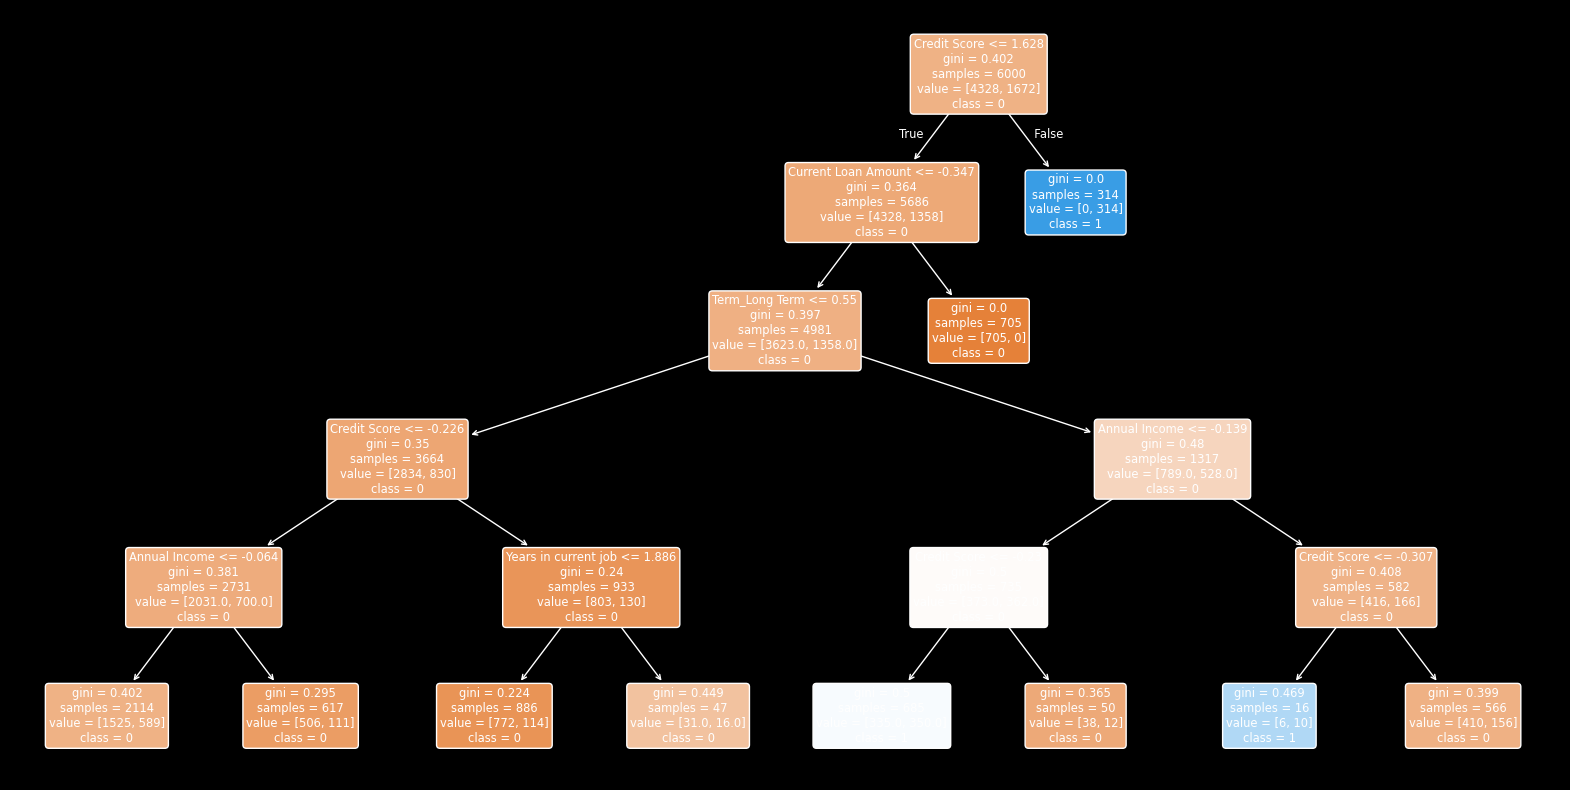

Accuracy sur les données de validation: 0.7626666666666667
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      1059
           1       0.67      0.39      0.49       441

    accuracy                           0.76      1500
   macro avg       0.72      0.65      0.67      1500
weighted avg       0.75      0.76      0.74      1500



In [609]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Initialiser un classificateur
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)


plt.figure(figsize=(20,10))  # Ajuste la taille de l'image selon la taille de ton arbre
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)
plt.show()

# Évaluer les performances sur les données de validation
y_pred_val = clf.predict(X_val)
print("Accuracy sur les données de validation:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))





## Conclusion

1. Accuracy (Précision globale)
Accuracy = 0.7627
Cela signifie que 76,27 % des prédictions du modèle sont correctes. C'est la proportion des prédictions correctes (que la prédiction soit pour la classe 0 ou 1) parmi l'ensemble des prédictions réalisées. Cependant, l'accuracy peut être trompeuse si les classes sont déséquilibrées. Ce qui est le cas ici.



2. Métriques pour chaque classe

Classe 0 (la classe majoritaire dans ce cas)
Precision = 0.78 :
Sur toutes les prédictions faites comme étant de la classe 0, 78 % étaient correctes. Autrement dit, si le modèle prédit que l'observation appartient à la classe 0, il a 80 % de chances de faire une prédiction correcte.


Recall = 0.92 :
Parmi toutes les vraies instances de la classe 0, 92 % ont été correctement identifiées par le modèle. Cela indique que le modèle est assez bon pour identifier la classe 0, mais il y a encore 8 % des exemples de la classe 0 qui sont manqués.


F1-score = 0.85 :
L'F1-score est une moyenne harmonique entre la precision et le recall. C'est une métrique utile quand on veut un compromis entre les deux, particulièrement dans des contextes où l'on veut éviter à la fois de fausses alertes (fausses positives) et des faux négatifs. Ici, le modèle montre un bon équilibre pour la classe 0.

Classe 1 (la classe minoritaire)
Precision = 0.67 :

Sur toutes les prédictions faites comme étant de la classe 1, 67 % étaient correctes. Le modèle semble avoir plus de mal à prédire correctement la classe 1 que la classe 0.


Recall = 0.39 :
Parmi toutes les vraies instances de la classe 1, 39 % ont été correctement identifiées. Cela suggère que le modèle a des difficultés à reconnaître la classe 1, et il manque 61 % des exemples de cette classe.


F1-score = 0.49 :
L'F1-score pour la classe 1 est relativement faible, ce qui reflète une combinaison de précision et de rappel qui n'est pas idéale. Cela montre que le modèle a un équilibre défavorable pour cette classe.

3. Métriques moyennes (macro et weighted avg)
Macro avg :
Precision = 0.72, Recall = 0.65, F1-score = 0.67 :
Ces valeurs sont les moyennes des métriques pour les deux classes, calculées sans tenir compte du déséquilibre des classes. La macro moyenne donne une idée générale de la performance du modèle sur toutes les classes, indépendamment de leur fréquence dans les données.


Weighted avg :
Precision = 0.75, Recall = 0.76, F1-score = 0.74 :
La weighted moyenne prend en compte la fréquence des classes dans le dataset (plus de 5000 instances de la classe 0 contre environ 2100 pour la classe 1). Ces valeurs montrent qu'en pondérant par la taille des classes, le modèle est un peu plus performant sur la classe 0, mais reste assez équilibré.


En conclusion:
Le modèle est globalement performant, mais il a un déséquilibre de performance entre les deux classes. 


Il fait un très bon travail pour prédire la classe 0, avec une précision élevée (78 %) et un rappel élevé (92 %).


Cependant, il a plus de mal avec la classe 1, avec un rappel faible (39 %) et un F1-score assez bas (49 %), ce qui suggère que le modèle manque beaucoup de cas positifs pour cette classe.


Cela pourrait être dû à un déséquilibre de classes (plus d'exemples de la classe 0 que de la classe 1)

## Matrice de Confusion :


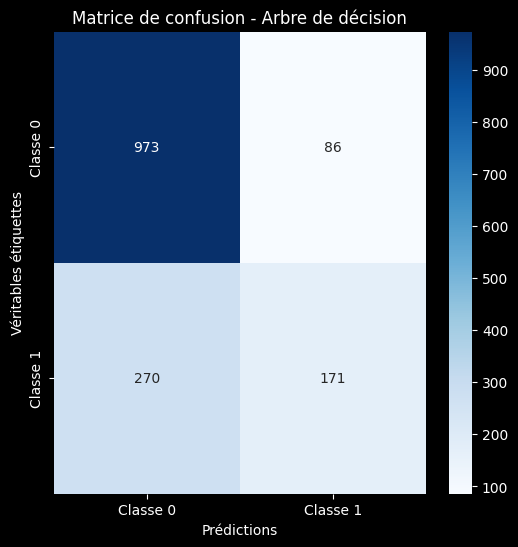

In [610]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_val, y_pred_val)

# Visualiser la matrice de confusion avec seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - Arbre de décision')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.show()


## Courbe de ROC et AUC

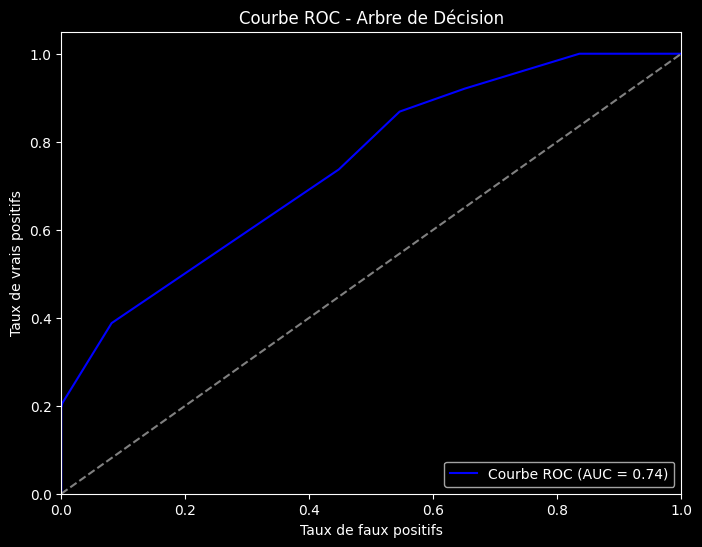

In [611]:
from sklearn.metrics import roc_curve, auc

# Obtenez les probabilités de la classe positive (classe 1)
y_prob_val = clf.predict_proba(X_val)[:, 1]  # Probabilité de la classe 1

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob_val)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - Arbre de Décision')
plt.legend(loc='lower right')
plt.show()


### Interpretation: 

Un AUC de 0.74 indique que le modèle a une bonne capacité à distinguer entre les classes, mais il n'est pas parfait

## Régression logistique :




In [612]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialiser un modèle de régression logistique
log_reg = LogisticRegression(random_state=42)

# Entraîner le modèle
log_reg.fit(X_train, y_train)

#Après avoir entraîné le modèle, nous allons faire des prédictions sur l'ensemble du jeu de validation
# Faire des prédictions sur les données de validation

y_pred_log_reg_val = log_reg.predict(X_val)

# Évaluer les performances
print("Accuracy:", accuracy_score(y_val, y_pred_log_reg_val))
print(classification_report(y_val, y_pred_log_reg_val))


Accuracy: 0.766
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1059
           1       0.85      0.25      0.38       441

    accuracy                           0.77      1500
   macro avg       0.80      0.61      0.62      1500
weighted avg       0.79      0.77      0.72      1500



## Conclusion : 

1. Accuracy : 76.6%
L'accuracy mesure la proportion globale des prédictions correctes. Ici, le modèle prédit correctement 76,6 % des cas. Bien que ce soit un bon résultat, ce chiffre seul ne suffit pas à évaluer la performance du modèle, surtout si les classes sont déséquilibrées. Ce qui est le cas ici.

2. Precision, Recall et F1-Score pour la classe 0 (Non-défaillant) :
Precision = 0.76 : Cela signifie que parmi toutes les prédictions faites par le modèle comme étant "0" (non défaut), 76 % étaient correctes.

Recall = 0.98 : Cela signifie que parmi tous les vrais cas "0", le modèle a réussi à en prédire 98 %. Cela indique que le modèle est très bon pour détecter les non-défaillants.

F1-Score = 0.86 : Le F1-score est une moyenne harmonique entre la précision et le rappel, donc ici, il est relativement élevé, ce qui signifie que le modèle a une bonne capacité à détecter les cas de "0" tout en minimisant les faux positifs.

3. Precision, Recall et F1-Score pour la classe 1 (Défaillant) :
Precision = 0.85 : Cela signifie que parmi toutes les prédictions faites par le modèle comme étant "1" (défaut), 85 % étaient correctes.

Recall = 0.25 : Ici, seulement 25 % des vrais cas "1" ont été détectés. C'est un faible score, ce qui signifie que le modèle a du mal à identifier les clients en défaut.

F1-Score = 0.38 : Ce score est également faible, ce qui reflète une mauvaise performance du modèle pour prédire les défauts

4. Macro et Weighted Averages :
Macro avg : Cela donne une moyenne simple des scores de chaque classe (sans tenir compte de la proportion des classes), ce qui donne un score de 0.80 pour la précision, 0.62 pour le rappel et 0.63 pour le F1-score.

Weighted avg : Cette moyenne prend en compte la distribution des classes. Ici, la précision et le rappel sont équilibrés à 0.79 et 0.77 respectivement, avec un F1-score global de 0.72.

En conclusion:
Le modèle est globalement performant, mais faible déséquilibre de performance entre les deux classes.


## Matrice de confusion:

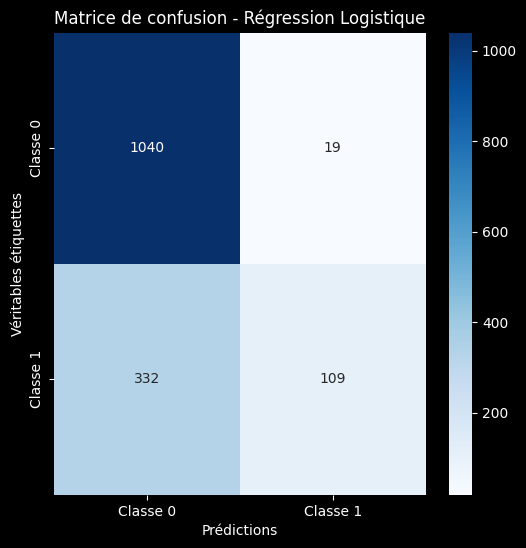

In [613]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion pour la régression logistique
cm_log_reg = confusion_matrix(y_val, y_pred_log_reg_val)

# Visualiser la matrice de confusion avec seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - Régression Logistique')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.show()


### Courbe de Roc et AUC

AUC: 0.7658853280059269


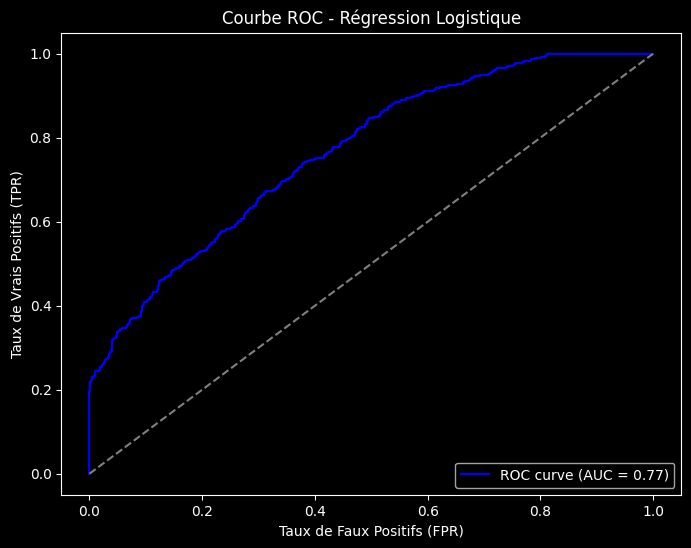

In [614]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Calculer les probabilités pour la classe positive (classe 1)
y_prob_log_reg_val = log_reg.predict_proba(X_val)[:, 1]


# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob_log_reg_val)

# Calculer l'AUC
auc = roc_auc_score(y_val, y_prob_log_reg_val)
print(f'AUC: {auc}')

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale de chance aléatoire
plt.title('Courbe ROC - Régression Logistique')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')
plt.show()


### Interpretation:

L'AUC de 0.77 pour la régression logistique indique que le modèle a performance acceptable à distinguer entre les deux classes. 

## Forêts aléatoires

In [615]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le classificateur de Forêt Aléatoire
rf_clf = RandomForestClassifier(random_state=42)

# Entraîner le modèle avec les données d'entraînement
rf_clf.fit(X_train, y_train)

# Prédictions sur le jeu de validation 
y_pred_rf_val = rf_clf.predict(X_val)

# Évaluer les performances
print("Accuracy:", accuracy_score(y_val, y_pred_rf_val))
print(classification_report(y_val, y_pred_rf_val))


Accuracy: 0.7633333333333333
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1059
           1       0.76      0.29      0.42       441

    accuracy                           0.76      1500
   macro avg       0.76      0.62      0.63      1500
weighted avg       0.76      0.76      0.72      1500



## Conclusion:

1. Accuracy (Précision globale) :
L'accuracy est de 76.33%, ce qui signifie que 76.33% des prédictions du modèle sont correctes sur l'ensemble de validation. Cependant, cette métrique seule peut être trompeuse si les classes sont déséquilibrées.

2. Métriques pour chaque classe :

Classe 0 (support : 1059 instances) :
Précision (Precision) : 0.76
Cela signifie que, parmi les prédictions de la classe 0, 76% étaient correctes.

Rappel (Recall) : 0.96
Cela signifie que le modèle a identifié 96% des instances appartenant réellement à la classe 0.

F1-score : 0.85
Le modèle a bien équilibré précision et rappel pour la classe 0, montrant une bonne performance.

Classe 1 (support : 441 instances)  :

Précision (Precision) : 0.76
Cela signifie que, parmi les prédictions de la classe 1, 76% étaient correctes.

Rappel (Recall) : 0.29
Cela signifie que le modèle n'a identifié que 29% des instances appartenant réellement à la classe 1.
Problème notable : Le modèle a de grandes difficultés à détecter la classe 1.

F1-score : 0.42
Un faible F1-score montre que le modèle est déséquilibré dans sa capacité à prédire correctement la classe 1.

3. Macro Avg (Moyenne non pondérée) :

Précision, Rappel, F1-score :
Ces moyennes prennent en compte les métriques de chaque classe avec un poids égal.

Précision moyenne : 0.76
Rappel moyen : 0.62
F1-score moyen : 0.63
Cela montre que, en moyenne, les performances du modèle sont limitées par sa faible capacité à gérer la classe 1.


4. Weighted Avg (Moyenne pondérée par le support):
Ces moyennes tiennent compte de l'importance relative des classes (plus de poids pour la classe 0, qui a plus d'exemples).

Précision pondérée : 0.76
Rappel pondéré : 0.76
F1-score pondéré : 0.72
Ces scores montrent que les performances globales semblent correctes, mais elles sont biaisées par la bonne performance sur la classe majoritaire (classe 0).

En résumé:


Le modèle Random Forest montre une bonne capacité à identifier la classe majoritaire (classe 0), mais il a des difficultés à prédire la classe minoritaire (classe 1).



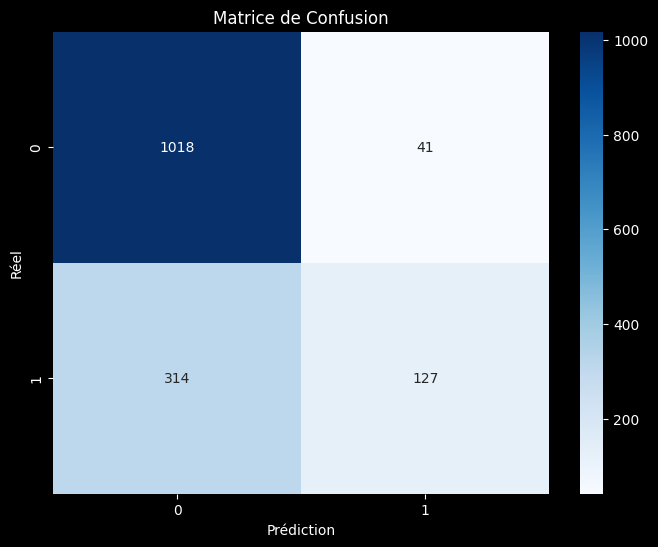

In [616]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculer la matrice de confusion
cm = confusion_matrix(y_val, y_pred_rf_val)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()


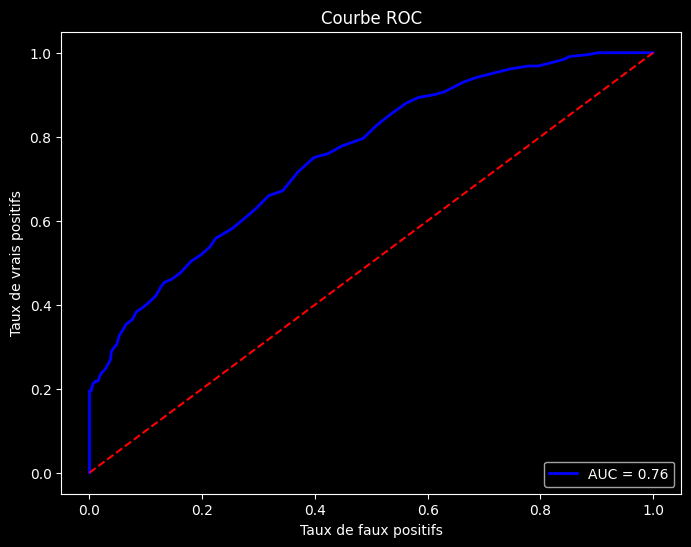

In [617]:
from sklearn.metrics import roc_curve, auc

# Calculer les probabilités pour la classe positive (classe 1)
y_prob_rf_val = rf_clf.predict_proba(X_val)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob_rf_val)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


### Interpretation: 

L'AUC de 0.76 indique que le modèle a performance acceptable à distinguer entre les deux classes.

## SVM (Support Vector Machines) :

In [618]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialisation du modèle SVM avec un noyau linéaire
svm = SVC(kernel='linear', random_state=42, probability=True, max_iter=1000)

# Entraînement du modèle
svm.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred_svm_val = svm.predict(X_val)

# Évaluation des performances
print("Accuracy:", accuracy_score(y_val, y_pred_svm_val))
print(classification_report(y_val, y_pred_svm_val))

Accuracy: 0.452
              precision    recall  f1-score   support

           0       0.71      0.38      0.50      1059
           1       0.29      0.62      0.40       441

    accuracy                           0.45      1500
   macro avg       0.50      0.50      0.45      1500
weighted avg       0.59      0.45      0.47      1500



## Conclusion: 

1. Accuracy (Précision globale): 0.452
L'accuracy est de 45,2%, ce qui signifie que le modèle fait des prédictions correctes environ 45% du temps.

2. Métriques pour chaque classe

Pour la classe 0 :

La précision de la classe 0 est assez bonne, ce qui signifie que, parmi toutes les prédictions où le modèle a dit "classe 0", 71% étaient correctes.

Le rappel pour la classe 0 est assez faible, ce qui signifie que parmi toutes les instances réelles de la classe 0, le modèle n'a réussi à en identifier que 38%.

Le F1-score(0.50) pour la classe 0 est relativement moyen, ce qui reflète un compromis entre la précision et le rappel.

Pour la classe 1 :

Précision de  0.29 (29%) : La précision de la classe 1 est faible, ce qui signifie qu'une grande proportion des prédictions de la classe 1 étaient incorrectes.


Recall de  0.62 (62%):Le rappel pour la classe 1 est meilleur, ce qui signifie que le modèle a identifié 62% des instances réelles de cette classe.


F1-score de 0.40 : Le F1-score pour la classe 1 est plus faible, ce qui indique que le modèle lutte davantage pour classer correctement les instances de cette classe.

Déséquilibre des classes :

Le déséquilibre des classes explique en grande partie cette performance biaisée. Le modèle est plus performant pour prédire la classe majoritaire (classe 0), ce qui conduit à des performances médiocres pour la classe minoritaire (classe 1). Cela se traduit par un recall faible pour la classe 1 et un biais vers la prédiction de la classe 0.

En résumé:

Le modèle SVM ne semble pas très performant, particulièrement pour la classe minoritaire (1). Il fait mieux sur la classe majoritaire (0) mais il est relativement mauvais pour détecter les instances de la classe 1.

## Matrice de confusion: 



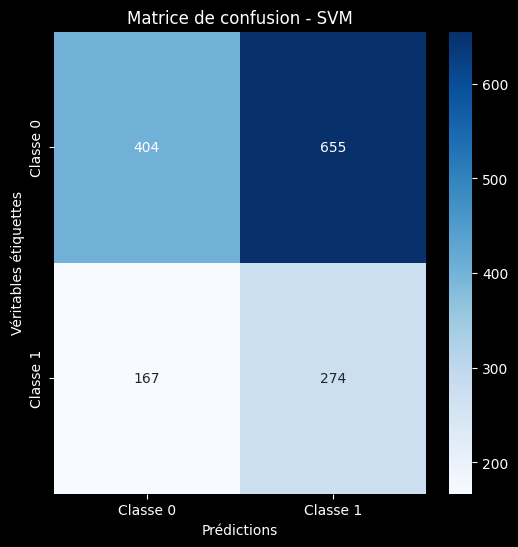

In [619]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion pour SVM
cm_svm = confusion_matrix(y_val, y_pred_svm_val)

# Visualiser la matrice de confusion avec seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - SVM')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.show()


### Courbe de ROC et AUC

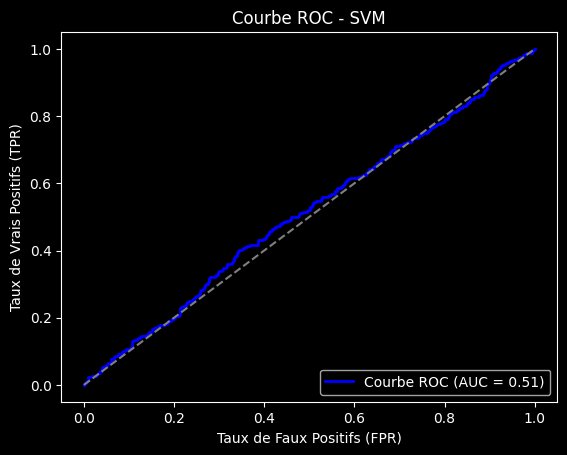

In [620]:
# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_val, svm.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - SVM')
plt.legend(loc="lower right")
plt.show()


### Interpretation:

L'AUC de 0.51 indique que suggère que le modèle ne parvient pas à mieux prédire que de simples prédictions aléatoires

## K-Nearest Neighbors (KNN) :

In [621]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Définition de la grille des hyperparamètres à tester (ici différentes valeurs pour n_neighbors)
param_grid = {'n_neighbors': range(1, 21)}  # Tester les valeurs de 1 à 20

# Initialisation du modèle KNN
knn = KNeighborsClassifier()

# GridSearchCV pour tester les différentes valeurs de n_neighbors avec validation croisée
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraînement avec la validation croisée
grid_search.fit(X_train, y_train)

# Affichage du meilleur hyperparamètre (meilleur n_neighbors)
print("Meilleur nombre de voisins (K) :", grid_search.best_params_['n_neighbors'])

# Prédictions avec le meilleur modèle
y_pred_knn_val = grid_search.best_estimator_.predict(X_val)

# Évaluation des performances
print("Accuracy sur les données de validation:", accuracy_score(y_val, y_pred_knn_val))
print(classification_report(y_val, y_pred_knn_val))


Meilleur nombre de voisins (K) : 20
Accuracy sur les données de validation: 0.6993333333333334
              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1059
           1       0.14      0.00      0.01       441

    accuracy                           0.70      1500
   macro avg       0.42      0.50      0.42      1500
weighted avg       0.54      0.70      0.58      1500



## Conclusion: 


1. Accuracy (Précision globale): 0.699 (~70 %)

L'accuracy est de 0.699 (~70 %), indique que le modèle prédit correctement 70 % des échantillons de validation. Cependant, l'accuracy seule peut être trompeuse, en particulier si les classes sont déséquilibrées (ce qui semble être le cas ici)

2. Métrique pour les classes

Pour la classe 0 :

Précision (Precision) : 0.70. Cela signifie que, parmi toutes les prédictions faites comme étant de la classe 0, 70% étaient correctes.

Rappel (Recall) : 0.99. Cela signifie que 99% des instances de la classe 0 ont été correctement identifiées par le modèle. Le modèle est donc très performant pour la classe 0.

F1-Score : 0.82. Une bonne combinaison de la précision et du rappel pour la classe 0. Le modèle fait bien pour la classe majoritaire.

Pour la classe 1 :

Précision (Precision) : 0.14. Parmi les prédictions faites comme étant de la classe 1,seulement 14 % étaient correctes.

Rappel (Recall) : 0.00. Le modèle n'a pratiquement pas réussi à identifier les instances réelles de la classe 1 (seules quelques-unes, voire aucune, ont été correctement classées)

F1-Score : 0.01. La combinaison de la précision et du rappel est faible, ce qui indique que la classe 1 est mal prédite.

3. Moyennes(sans pondération des effectifs) Macro avg :

La macro-moyenne montre des résultats faibles (~0.42 pour F1-score), en raison des mauvaises performances sur la classe 1.

4. Weightedtenant compte de la proportion des instances dans chaque classe() avg :

Avec une pondération pour la classe majoritaire (classe 0), les scores sont légèrement meilleurs (~0.58 pour F1-score), mais toujours médiocres.

Déséquilibre des classes :

Le déséquilibre des classes explique en grande partie cette performance biaisée. Le modèle est plus performant pour prédire la classe majoritaire (classe 0), ce qui conduit à des performances médiocres pour la classe minoritaire (classe 1). Cela se traduit par un recall faible pour la classe 1 et un biais vers la prédiction de la classe 0.

En résumé:

En résumé, le modèle KNN avec K=20 montre de bonnes performances pour la classe 0 (majoritaire), mais échoue à prédire la classe 1 (minoritaire).

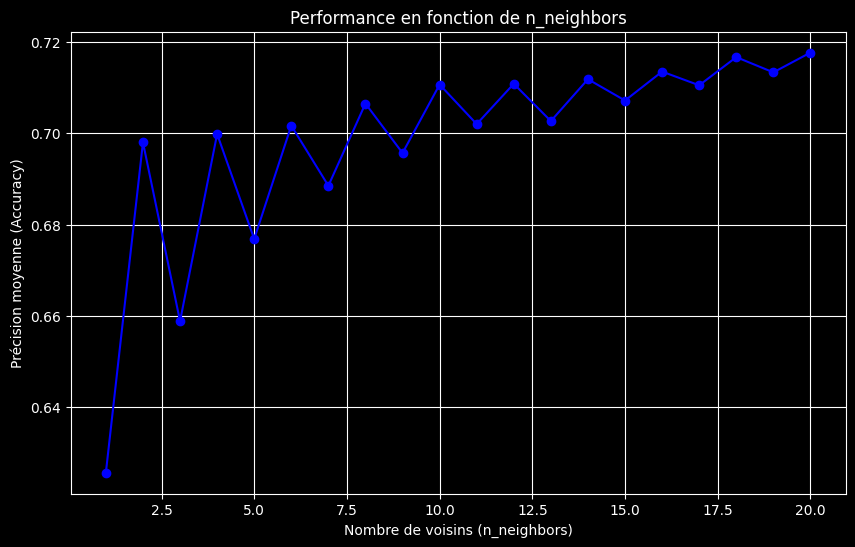

In [622]:
import matplotlib.pyplot as plt

# Tracer la courbe de validation pour n_neighbors
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o', linestyle='-', color='b')
plt.title('Performance en fonction de n_neighbors')
plt.xlabel('Nombre de voisins (n_neighbors)')
plt.ylabel('Précision moyenne (Accuracy)')
plt.grid(True)
plt.show()


Courbe de validation : La courbe montre la précision moyenne (accuracy) pour chaque valeur de n_neighbors. Cela permet de voir quelle valeur de K donne la meilleure performance en termes de précision.

### Matrice de Confusion

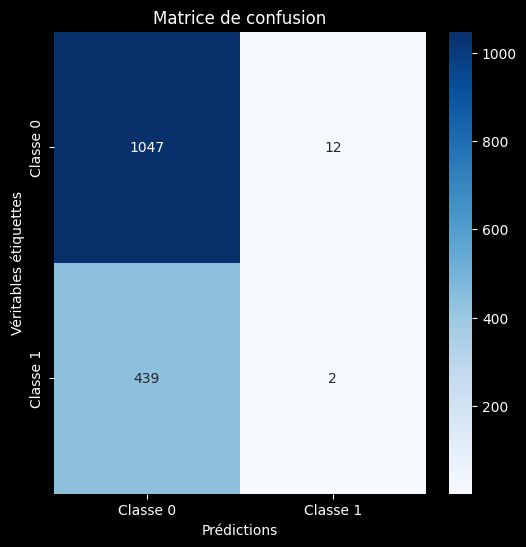

In [623]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calcul de la matrice de confusion
cm = confusion_matrix(y_val, y_pred_knn_val)

# Visualisation avec seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.show()


### Courbe de ROC et AUC:


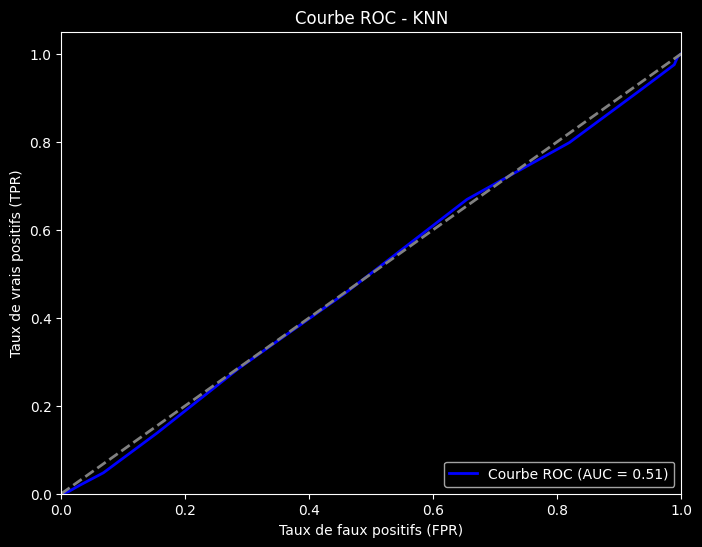

In [624]:
# Calcul des probabilités pour la courbe ROC (utilisation de predict_proba)
y_prob_val = grid_search.best_estimator_.predict_proba(X_val)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob_val)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # La ligne diagonale (random)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - KNN')
plt.legend(loc='lower right')
plt.show()




### Interpretation:

AUC modéré : Bien que le modèle ait un AUC relativement supérieur à 0.5, cela suggère qu'il n'est pas très bon pour séparer les classes, en particulier dans un cas de classe déséquilibrée. le modèle ne parvient pas à mieux prédire que de simples prédictions aléatoires

# Comparaison et Validation croisé des modèles 

In [625]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Liste des modèles à comparer
models = {
    "Arbre de décision": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Régression Logistique": LogisticRegression(random_state=42, class_weight='balanced'),
    "Forêts Aléatoires": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "SVM": SVC(random_state=42, class_weight='balanced'),
    "KNN": KNeighborsClassifier()
}

# Dictionnaire pour stocker les résultats des scores de validation croisée
cv_results = {}

# Effectuer la validation croisée pour chaque modèle
for model_name, model in models.items():
    # Validation croisée avec 5 plis
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = cv_scores
    print(f"Validation croisée - {model_name}: Accuracy moyenne = {np.mean(cv_scores):.4f}")

# Comparaison des scores de validation croisée
print("\nComparaison des scores de validation croisée:")
for model_name, scores in cv_results.items():
    print(f"{model_name}: {scores} -> Moyenne: {np.mean(scores):.4f}")

# Effectuer une évaluation complète sur les données de test
best_model_name = max(cv_results, key=lambda x: np.mean(cv_results[x]))
best_model = models[best_model_name]

# Entraînement du meilleur modèle
best_model.fit(X_train, y_train)

# Prédictions sur le test set
y_pred = best_model.predict(X_val)

# Calcul des métriques de performance sur le test set
print("\nÉvaluation sur le test set pour le meilleur modèle:")
print(f"Meilleur modèle: {best_model_name}")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Validation croisée - Arbre de décision: Accuracy moyenne = 0.6908
Validation croisée - Régression Logistique: Accuracy moyenne = 0.6872
Validation croisée - Forêts Aléatoires: Accuracy moyenne = 0.7793
Validation croisée - SVM: Accuracy moyenne = 0.5130
Validation croisée - KNN: Accuracy moyenne = 0.6768

Comparaison des scores de validation croisée:
Arbre de décision: [0.67916667 0.69916667 0.69166667 0.6925     0.69166667] -> Moyenne: 0.6908
Régression Logistique: [0.6825     0.6875     0.68416667 0.68083333 0.70083333] -> Moyenne: 0.6872
Forêts Aléatoires: [0.77833333 0.78083333 0.775      0.78166667 0.78083333] -> Moyenne: 0.7793
SVM: [0.585      0.43083333 0.53583333 0.46083333 0.5525    ] -> Moyenne: 0.5130
KNN: [0.67416667 0.67       0.68666667 0.68666667 0.66666667] -> Moyenne: 0.6768

Évaluation sur le test set pour le meilleur modèle:
Meilleur modèle: Forêts Aléatoires
Accuracy: 0.7613333333333333
              precision    recall  f1-score   support

           0       0.76 

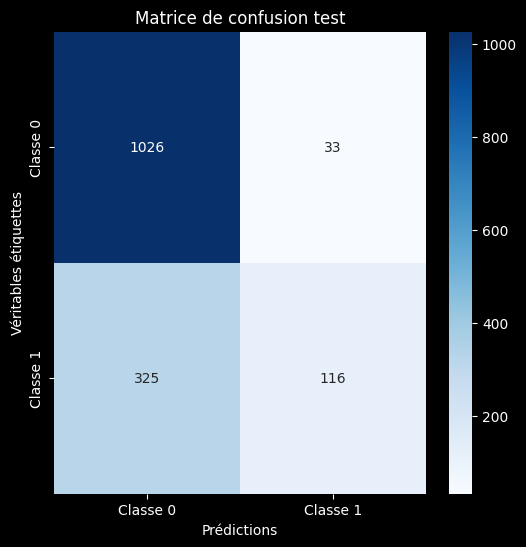

In [626]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calcul de la matrice de confusion
cm = confusion_matrix(y_val, y_pred)

# Visualisation avec seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion test')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.show()


## Conclusion:

1. Scores de validation croisée :
Les résultats de la validation croisée montrent la moyenne d'accuracy pour chaque modèle sur les 5 plis. Ces scores aident à évaluer la stabilité et la performance générale des modèles, tout en réduisant les risques de sur-apprentissage (overfitting).

Arbre de décision (Accuracy moyenne = 0.6908) : L'arbre de décision a une performance correcte.
Performance moyenne, avec une forte variation entre les folds (de 0.6791 à 0.6991). Cela indique que l’arbre de décision est sensible aux variations dans les données d’entraînement, probablement dû à un surapprentissage (overfitting) dans certains cas.

Régression logistique (Accuracy moyenne = 0.6872) : La régression logistique montre une performance stable, mais légèrement inférieure à celle des forêts aléatoires.  C'est un modèle linéaire, donc il pourrait être limité si les relations entre les variables ne sont pas linéaires.

Forêts aléatoires (Accuracy moyenne = 0.7793) :
C'est clairement le modèle le plus performant en validation croisée. Il combine plusieurs arbres de décision pour améliorer la généralisation et réduire le surapprentissage. La faible variance entre les plis confirme qu'il s'adapte bien aux données.

SVM (Accuracy moyenne = 0.5130) : Le SVM affiche des performances très faibles.
Cela pourrait être dû à des hyperparamètres non optimaux ou à un déséquilibre dans les classes.

KNN (Accuracy moyenne = 0.6768) : KNN a des performances modestes, probablement à cause de la nature des données ou d'un choix sous-optimal du nombre de voisins. Cela peut indiquer que KNN n'est pas adapté à vos données ou qu'il est sensible aux déséquilibres ou à des caractéristiques spécifiques.


2. Comparaison des scores en validation croisée :

Forêts aléatoires se démarque avec la meilleure moyenne (0.7793), suivie par l'arbre de décision et la régression logistique.

SVM et KNN montrent des scores faibles, ce qui les rend moins fiables pour ce problème.

Cela indique que les modèles non linéaires comme les forêts aléatoires ou les arbres de décision peuvent mieux capturer les patterns complexes des données.


3. Évaluation sur le test set pour le meilleur modèle :

Le modèle Forêts aléatoires, choisi comme meilleur modèle, montre une accuracy de 0.7613 sur le jeu de test. Cependant, une analyse plus fine des métriques (précision, rappel, F1-score) révèle des points importants :

Classe 0 (majoritaire) : Très bien prédite avec une précision de 76 % et un rappel de 97 %.

Classe 1 (minoritaire) : Faible rappel (26 %), ce qui indique que de nombreuses instances de cette classe ne sont pas correctement identifiées.


Ce problème de rappel faible pour la classe minoritaire peut être dû à un déséquilibre des classes ou au choix des hyperparamètres.



# Validation croisée avec F1-score macro :


Pour améliorer la pondération des classes, nous allons utiliser l'argument class_weight='balanced' dans les modèles comme Arbre de décision, RandomForestClassifier, LogisticRegression et SVM. 

Les classes étant déséquilibrées, pour accorder donc la même importance à chaque classe, indépendament de sa taille, nous allons utiliser le F1-score macro. 

Le F1-score macro est une bonne métrique pour évaluer un modèle, surtout lorsqu'on a  des classes déséquilibrées, car il donne une importance égale à toutes les classes, indépendamment de leur fréquence.

In [627]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Liste des modèles à comparer
models = {
    "Arbre de décision": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Régression Logistique": LogisticRegression(random_state=42, class_weight='balanced'),
    "Forêts Aléatoires": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "SVM": SVC(random_state=42, class_weight='balanced'),
    "KNN": KNeighborsClassifier()
}

# Dictionnaire pour stocker les résultats des scores de validation croisée
cv_results = {}

# Effectuer la validation croisée pour chaque modèle
for model_name, model in models.items():
    # Validation croisée avec 5 plis
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    cv_results[model_name] = cv_scores
    print(f"Validation croisée - {model_name}:  F1-score macro moyen = {np.mean(cv_scores):.4f}")

# Comparaison des scores de validation croisée
print("\nComparaison des scores de validation croisée:")
for model_name, scores in cv_results.items():
    print(f"{model_name}: {scores} -> Moyenne F1-macro: {np.mean(scores):.4f}")

# Effectuer une évaluation complète sur les données de test
best_model_name = max(cv_results, key=lambda x: np.mean(cv_results[x]))
best_model = models[best_model_name]

# Entraînement du meilleur modèle
best_model.fit(X_train, y_train)

# Prédictions sur le test set
y_pred = best_model.predict(X_val)

# Calcul des métriques de performance sur le test set
print("\nÉvaluation sur le test set pour le meilleur modèle:")
print(f"Meilleur modèle: {best_model_name}")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Validation croisée - Arbre de décision:  F1-score macro moyen = 0.6177
Validation croisée - Régression Logistique:  F1-score macro moyen = 0.6462
Validation croisée - Forêts Aléatoires:  F1-score macro moyen = 0.6379
Validation croisée - SVM:  F1-score macro moyen = 0.4737
Validation croisée - KNN:  F1-score macro moyen = 0.4912

Comparaison des scores de validation croisée:
Arbre de décision: [0.60104971 0.6299457  0.61264521 0.61692552 0.62813572] -> Moyenne F1-macro: 0.6177
Régression Logistique: [0.63793566 0.65164212 0.63935417 0.64071266 0.66151209] -> Moyenne F1-macro: 0.6462
Forêts Aléatoires: [0.62855906 0.64693208 0.62430427 0.64047863 0.64924564] -> Moyenne F1-macro: 0.6379
SVM: [0.50595238 0.42980342 0.48793812 0.45044328 0.49433084] -> Moyenne F1-macro: 0.4737
KNN: [0.4785363  0.49378739 0.49271224 0.51193974 0.47916667] -> Moyenne F1-macro: 0.4912

Évaluation sur le test set pour le meilleur modèle:
Meilleur modèle: Régression Logistique
Accuracy: 0.686
              prec

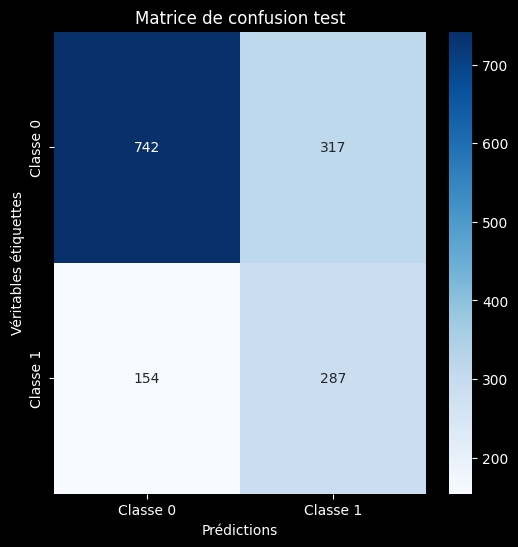

In [628]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calcul de la matrice de confusion
cm = confusion_matrix(y_val, y_pred)

# Visualisation avec seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion test')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.show()


# Conclusion:
 
1. 
Régression Logistique a la meilleure moyenne F1-score macro (0.6462), ce qui indique qu'elle a bien équilibré la précision et le rappel pour toutes les classes.

Forêts Aléatoires suit avec un F1-score macro moyen de 0.6379, et Arbre de décision est un peu derrière à 0.6177.

SVM et KNN sont en bas du classement, avec des moyennes de 0.4737 et 0.4912 respectivement, ce qui montre qu'ils ont de moins bons résultats sur les classes déséquilibrées.

2. Meilleur modèle : Régression Logistique

Après avoir effectué la validation croisée, le modèle de Régression Logistique a été sélectionné comme le meilleur, car il a obtenu la meilleure moyenne F1-score macro.

3. Performance sur le jeu de test :

Accuracy : 0.686, ce qui signifie que le modèle prédit correctement 68.6 % des exemples du jeu de test.

La précision pour la classe 0 est relativement bonne (0.83), mais pour la classe 1, elle est plus faible (0.48), ce qui indique que le modèle fait moins bien pour la classe minoritaire.

Le rappel pour la classe 1 (0.65) est supérieur à sa précision, ce qui montre que le modèle détecte une partie significative des exemples de cette classe, mais encore une fois pas aussi bien que la classe 0.

Le f1-score pour la classe 0 est de 0.76, tandis que pour la classe 1, il est de 0.55, ce qui reflète l'impact du déséquilibre des classes.

En conclusion: 

Le modèle de régression logistique semble être le meilleur choix basé sur F1-score macro, car il maintient un bon équilibre entre précision et rappel pour toutes les classes, en particulier la classe majoritaire.

Toutefois, même si la précision de la classe 0 est bonne, la classe minoritaire (classe 1) a une précision relativement faible, ce qui peut suggérer un manque de puissance dans la prédiction des cas de cette classe.


## Recommendation

Suggestions pour améliorer la performance sur la classe minoritaire :


1. Rééchantillonnage des données :

On peut utiliser l'oversampling (par exemple, SMOTE) pour augmenter le nombre d'exemples de la classe minoritaire, ou l'undersampling pour réduire la classe majoritaire.

2. Ajustement des seuils de décision :

Pour les modèles comme la régression logistique, on peut ajuster le seuil de décision pour favoriser la prédiction de la classe minoritaire.

3. Utilisation de modèles plus complexes :

Par exemple, des modèles comme XGBoost ou LightGBM, qui sont souvent plus efficaces dans la gestion des classes déséquilibrées.

# Prédire Credit Default avec le meilleur modele 

In [629]:
# Prédictions sur le test set
y_pred_ad =  best_model.predict(X_test)


In [630]:
import pandas as pd


# Créer le DataFrame de sortie
output = pd.DataFrame({'Id': X_test['Id'], 'Credit Default': y_pred_ad})

# Afficher les premières lignes pour vérifier le format
print(output.head())



     Id  Credit Default
0  7500               0
1  7501               0
2  7502               1
3  7503               0
4  7504               1


## Pour générer un fichier CSV

In [631]:
import pandas as pd


# Créer le DataFrame
output_df = pd.DataFrame({
    'Id': X_test['Id'],
    'Credit Default':  y_pred_ad
})

# Sauvegarder en fichier CSV
output_df.to_csv('submission.csv', index=False)

print("Fichier CSV généré avec succès!")


Fichier CSV généré avec succès!
